In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import os.path
from pathlib import Path
import glob

In [3]:
from PIL import Image
from keras.preprocessing import image

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers

In [5]:
from keras import models
from keras import layers
import tensorflow as tf

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve


In [7]:
from keras import optimizers


In [8]:
from keras.optimizers import Optimizer


In [9]:
from tensorflow.keras.models import Sequential

In [10]:
from keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D

In [11]:
from keras import models
from keras import layers
import tensorflow as tf

In [12]:
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
!unzip gdrive/"MyDrive/Data"/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_83.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_84.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_85.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_86.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_87.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_88.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_89.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_9.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_90.jpg  
  inflating: Data/Hemorrhagic/KANAMA/4[4]/4_0_10.jpg  
  inflating: Data/Hemorrhagic/KANAMA/4[4]/4_0_100.jpg  
  inflating: Data/Hemorrhagic/KANAMA/4[4]/4_0_101.jpg  
  inflating: Data/Hemorrhag

In [15]:
Brain_CT_Path = Path("/content/Data")
JPG_Path = list(Brain_CT_Path.glob("**/*.jpg"))
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

In [16]:
#print(JPG_Labels)

In [17]:
#print(JPG_Labels_Series)

In [18]:

Main_Data["CATEGORY"].replace({"11[11]":"Hemorrhage","11[11]":"Hemorrhage","12[12]":"Hemorrhage","13[13]":"Hemorrhage",
                               "14[14]":"Hemorrhage","15[15]":"Hemorrhage","17[17]__":"Hemorrhage",
                               "19[19]":"Hemorrhage","1[1]":"Hemorrhage","20[20]_2":"Hemorrhage",
                               "21[21] _2":"Hemorrhage","2[2]":"Hemorrhage","3[3]":"Hemorrhage","4[4]":"Hemorrhage","5[5]":"Hemorrhage",
                               "6[6]":"Hemorrhage","7[7]":"Hemorrhage","8[8]":"Hemorrhage","9[9]":"Hemorrhage"},inplace=True)

In [19]:
Main_Data["CATEGORY"].replace({"N10[N10]":"Normal","N11[N11]":"Normal","N12[N12]":"Normal","N13[N13]":"Normal","N14[N14]":"Normal",
                               "N15[N15]":"Normal","N15[N15]":"Normal",
                               "N16[N16]":"Normal","N17[N17]":"Normal","N18[N18]":"Normal",
                               "N19[N19]":"Normal","N1[N1]":"Normal","N20[N20]":"Normal","N21[N21]":"Normal",
                               "N22[N22]":"Normal","N23[N23]":"Normal","N24[N24]":"Normal",
                               "N25[N25]":"Normal","N26[N26]":"Normal","N27[N27]":"Normal","N2[N2]":"Normal",
                               "N3[N3]":"Normal","N4[N4]":"Normal","N5[N5]":"Normal",
                               "N6[N6]":"Normal","N7[N7]":"Normal","N8[N8]":"Normal","N9[N9]":"Normal"},inplace=True)

In [20]:
print(Main_Data["CATEGORY"].value_counts())

Normal        4105
Hemorrhage    2667
Name: CATEGORY, dtype: int64


In [21]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

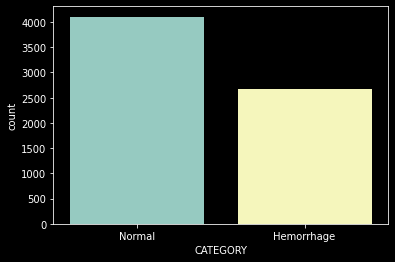

In [22]:
plt.style.use('dark_background')

sns.countplot(Main_Data["CATEGORY"])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

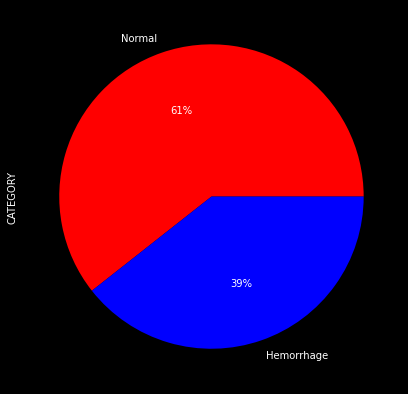

In [23]:
Colors=['red','blue']
Main_Data["CATEGORY"].value_counts().plot.pie(figsize=(7,7),autopct='%.0f%%',colors=Colors)
plt.show

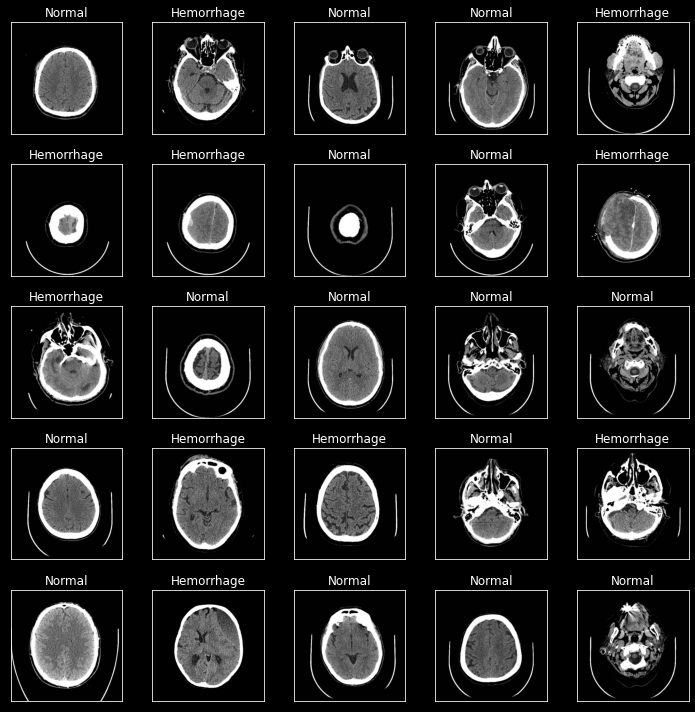

In [24]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

In [25]:

Train_Data,Test_Data = train_test_split(Main_Data,train_size=0.9,shuffle=True,random_state=42)

In [26]:
print("TRAIN SHAPE(rows,columns) : ",Train_Data.shape)
print("TEST SHAPE(rows,columns)  : ",Test_Data.shape)

TRAIN SHAPE(rows,columns) :  (6094, 2)
TEST SHAPE(rows,columns)  :  (678, 2)


In [27]:
Generator = ImageDataGenerator(rescale=1.0/255,
                               zoom_range=0.2,
                              shear_range=0.2,
                              rotation_range=40,
                              horizontal_flip=True,
                               fill_mode="nearest",
                               validation_split=0.1
                              )
Test_Generator = ImageDataGenerator(rescale=1.0/255)

In [28]:
Train_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                              
                                             class_mode="categorical",
                                              subset="training"
                                             )

Found 5485 validated image filenames belonging to 2 classes.


In [29]:
Validation_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                             
                                            
                                             class_mode="categorical",
                                              subset="validation"
                                             )

Found 609 validated image filenames belonging to 2 classes.


In [30]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="JPG",
                                                 y_col="CATEGORY",
                                                 
                                                 class_mode="categorical"
                                                  )


Found 678 validated image filenames belonging to 2 classes.


In [31]:
from keras.models import Model

In [32]:

Model = Sequential()

Model.add(Conv2D(16,kernel_size=(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
Model.add(MaxPooling2D((2,2)))

Model.add(Conv2D(32,kernel_size=(3,3), activation="relu",padding="same"))
Model.add(MaxPooling2D((2,2)))


Model.add(Conv2D(64,kernel_size=(3,3) ,activation="relu",padding="same"))
Model.add(MaxPooling2D((2,2)))

Model.add(Conv2D(128,kernel_size=(3,3) ,activation="relu",padding="same"))
Model.add(MaxPooling2D((2,2)))

Model.add(Flatten())

Model.add(Dense(550,activation="relu"))
Model.add(Dropout(0.1))

Model.add(Dense(400,activation="relu"))
Model.add(Dropout(0.3))

Model.add(Dense(300,activation="relu"))
Model.add(Dropout(0.4))

Model.add(Dense(200,activation="relu"))
Model.add(Dropout(0.5))

Model.add(Dense(2,activation="softmax"))

In [33]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [34]:
Model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [35]:
call_back=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
    mode="min" )

In [36]:


CNN_Model= Model.fit(Train_IMG_Set,
                    validation_data=Validation_IMG_Set,
                    callbacks=call_back,
                    epochs=15,
                              
                              )

Epoch 1/15
172/172 [==============================] - 102s 544ms/step - loss: 0.6740 - accuracy: 0.6015 - val_loss: 0.6623 - val_accuracy: 0.5977
Epoch 2/15
172/172 [==============================] - 92s 532ms/step - loss: 0.6555 - accuracy: 0.6124 - val_loss: 0.6275 - val_accuracy: 0.6420
Epoch 3/15
172/172 [==============================] - 91s 531ms/step - loss: 0.6273 - accuracy: 0.6543 - val_loss: 0.5941 - val_accuracy: 0.6732
Epoch 4/15
172/172 [==============================] - 92s 536ms/step - loss: 0.5883 - accuracy: 0.6913 - val_loss: 0.5697 - val_accuracy: 0.7044
Epoch 5/15
172/172 [==============================] - 91s 532ms/step - loss: 0.5541 - accuracy: 0.7247 - val_loss: 0.5442 - val_accuracy: 0.7225
Epoch 6/15
172/172 [==============================] - 92s 536ms/step - loss: 0.5178 - accuracy: 0.7502 - val_loss: 0.5570 - val_accuracy: 0.6847
Epoch 7/15
172/172 [==============================] - 91s 532ms/step - loss: 0.4929 - accuracy: 0.7637 - val_loss: 0.4366 - val_a

In [37]:
model_json = Model.to_json()
with open('cnn_model.json','w') as json_file :
    json_file.write(model_json)

Model.save_weights("cnn_weights.h5")
print("Model is saved to the disk")

Model is saved to the disk


In [38]:
from tensorflow.keras.models import model_from_json

with open("cnn_model.json","r") as file :
    model_json = file.read()
    loaded_model = model_from_json(model_json)

In [39]:
loaded_model.load_weights("cnn_weights.h5")

In [40]:
Model.predict(Test_IMG_Set)

22/22 [==============================] - 3s 139ms/step


array([[0.00795107, 0.9920489 ],
       [0.5113448 , 0.4886552 ],
       [0.7560693 , 0.24393065],
       ...,
       [0.37221277, 0.6277872 ],
       [0.00695557, 0.99304444],
       [0.57628775, 0.42371222]], dtype=float32)

In [41]:
Model_Results = Model.evaluate(Test_IMG_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])



LOSS:  0.2556
ACCURACY:  0.91


In [42]:
 Prediction =Model.predict(Test_IMG_Set)
 Prediction = Prediction.argmax(axis=-1)
 Prediction

22/22 [==============================] - 3s 129ms/step


array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,

In [43]:
len(Prediction)

678

In [44]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
image_path = Test_Data.iloc[100,0]
new_img = load_img(image_path,target_size=(256,256))
img = img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255
img_class = Model.predict(img)
img_class = np.argmax(img_class,axis=1) 
classname = Test_Data.iloc[100,1]
img_prob = Model.predict(img) 
prediction_prob = img_prob.max()
pred_dict = {"Class":classname, "Probability":img_prob}
print(pred_dict)

1/1 [==============================] - 0s 15ms/step
{'Class': 'Normal', 'Probability': array([[0.4515832 , 0.54841673]], dtype=float32)}


In [45]:
classnames = []
pred_prob = []
for i in range(678):
  image_path = Test_Data.iloc[i,0]
  new_img = load_img(image_path,target_size=(256,256),grayscale=False)
  img = img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255
  img_class = Model.predict(img) 
  img_class = np.argmax(img_class,axis=1) 
  classname = Test_Data.iloc[i,1]
  classnames.append(classname)
  img_prob = Model.predict(img) 
  #prediction_prob = img_prob.max()
  pred_prob.append(img_prob)

1/1 [==============================] - 0s 15ms/step


In [46]:
# for i in range(2):
#   print(pred_prob[i])

In [47]:
pred_prob=np.round(pred_prob)

pred_prob

array([[[0., 1.]],

       [[0., 1.]],

       [[0., 1.]],

       ...,

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]]], dtype=float32)

In [48]:
labels_raw=dict(np.ndenumerate(pred_prob))

labels_raw

{(0, 0, 0): 0.0,
 (0, 0, 1): 1.0,
 (1, 0, 0): 0.0,
 (1, 0, 1): 1.0,
 (2, 0, 0): 0.0,
 (2, 0, 1): 1.0,
 (3, 0, 0): 0.0,
 (3, 0, 1): 1.0,
 (4, 0, 0): 0.0,
 (4, 0, 1): 1.0,
 (5, 0, 0): 0.0,
 (5, 0, 1): 1.0,
 (6, 0, 0): 0.0,
 (6, 0, 1): 1.0,
 (7, 0, 0): 1.0,
 (7, 0, 1): 0.0,
 (8, 0, 0): 1.0,
 (8, 0, 1): 0.0,
 (9, 0, 0): 0.0,
 (9, 0, 1): 1.0,
 (10, 0, 0): 1.0,
 (10, 0, 1): 0.0,
 (11, 0, 0): 0.0,
 (11, 0, 1): 1.0,
 (12, 0, 0): 0.0,
 (12, 0, 1): 1.0,
 (13, 0, 0): 0.0,
 (13, 0, 1): 1.0,
 (14, 0, 0): 1.0,
 (14, 0, 1): 0.0,
 (15, 0, 0): 1.0,
 (15, 0, 1): 0.0,
 (16, 0, 0): 1.0,
 (16, 0, 1): 0.0,
 (17, 0, 0): 1.0,
 (17, 0, 1): 0.0,
 (18, 0, 0): 1.0,
 (18, 0, 1): 0.0,
 (19, 0, 0): 0.0,
 (19, 0, 1): 1.0,
 (20, 0, 0): 1.0,
 (20, 0, 1): 0.0,
 (21, 0, 0): 0.0,
 (21, 0, 1): 1.0,
 (22, 0, 0): 0.0,
 (22, 0, 1): 1.0,
 (23, 0, 0): 1.0,
 (23, 0, 1): 0.0,
 (24, 0, 0): 1.0,
 (24, 0, 1): 0.0,
 (25, 0, 0): 1.0,
 (25, 0, 1): 0.0,
 (26, 0, 0): 1.0,
 (26, 0, 1): 0.0,
 (27, 0, 0): 1.0,
 (27, 0, 1): 0.0,
 (28, 0, 0):

In [49]:
i=0
k=0
labels={}
for v in labels_raw.values():
    if v==1:
        labels[k]=i%2
        k+=1
    i+=1

In [50]:
labels_test=[] 
for v in labels.values():
    labels_test.append(v)

labels_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [51]:
Actual=Test_Data['CATEGORY']

Actual=Actual.reset_index(drop=True)
Actual

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
          ...    
673    Hemorrhage
674    Hemorrhage
675        Normal
676        Normal
677        Normal
Name: CATEGORY, Length: 678, dtype: object

In [52]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---")
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---")
print("TEST: ")
print(Test_IMG_Set.batch_size)
print(Test_IMG_Set.image_shape)

TRAIN: 
{'Hemorrhage': 0, 'Normal': 1}
[0, 1, 1, 0, 1]
(256, 256, 3)
---
VALIDATION: 
{'Hemorrhage': 0, 'Normal': 1}
[1, 1, 1, 1, 0]
(256, 256, 3)
---
TEST: 
32
(256, 256, 3)


In [53]:
for i in range(678):
  if Actual[i]== "Hemorrhage":
      Actual[i]=0
  else :
      Actual[i]=1

In [54]:
type(Actual),type(labels_test)

(pandas.core.series.Series, list)

In [55]:
Actual=Actual.to_numpy(dtype="int64")

In [56]:
type(Actual),type(labels_test)

(numpy.ndarray, list)

In [57]:
print(len(labels_test), len(Actual))

678 678


In [58]:
print(classification_report(Actual,labels_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       258
           1       0.95      0.90      0.92       420

    accuracy                           0.91       678
   macro avg       0.90      0.91      0.90       678
weighted avg       0.91      0.91      0.91       678



In [59]:
accuracy_score(Actual,labels_test)

0.9070796460176991

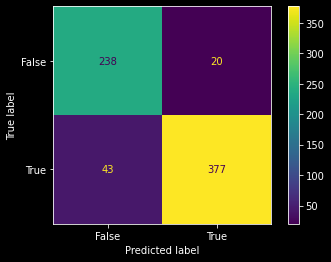

In [60]:
from sklearn import metrics
actual = Actual
predicted =labels_test

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

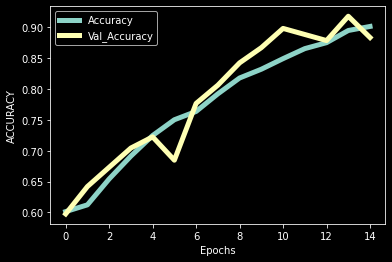

In [61]:
plt.plot(CNN_Model.history["accuracy"],label="Accuracy",linewidth=5)
plt.plot(CNN_Model.history["val_accuracy"],label="Val_Accuracy",linewidth=5)
plt.ylabel("ACCURACY")
plt.xlabel("Epochs")
plt.legend()
plt.show()

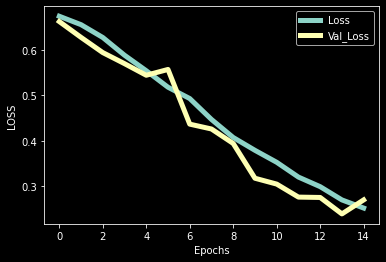

In [62]:
plt.plot(CNN_Model.history["loss"],label="Loss",linewidth=5)
plt.plot(CNN_Model.history["val_loss"],label="Val_Loss",linewidth=5)
plt.ylabel("LOSS")
plt.xlabel("Epochs")
plt.legend()
plt.show()

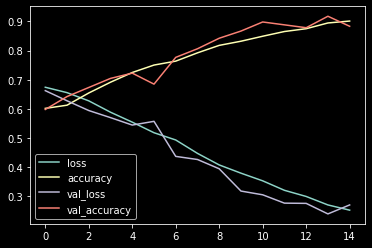

In [63]:
Dict_Summary = pd.DataFrame(CNN_Model.history)
Dict_Summary.plot()
